In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [13]:
X.shape

(6, 3, 1)

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 30465.0176
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 30151.4609
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 29872.7188
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 29618.0527
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 29375.5410
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 29140.9902
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 28912.7500
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 28685.5098
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 28457.3496
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 28226.7793
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 27990.1094
Epoch 12/300
1/1 [==============================] - 0s 5ms/step - loss: 27743.1250
Epoch 13/3

1/1 [==============================] - 0s 5ms/step - loss: 17.7266
Epoch 102/300
1/1 [==============================] - 0s 0s/step - loss: 17.5348
Epoch 103/300
1/1 [==============================] - 0s 5ms/step - loss: 17.0662
Epoch 104/300
1/1 [==============================] - 0s 5ms/step - loss: 16.4062
Epoch 105/300
1/1 [==============================] - 0s 5ms/step - loss: 15.6558
Epoch 106/300
1/1 [==============================] - 0s 5ms/step - loss: 14.9140
Epoch 107/300
1/1 [==============================] - 0s 6ms/step - loss: 14.2634
Epoch 108/300
1/1 [==============================] - 0s 5ms/step - loss: 13.7613
Epoch 109/300
1/1 [==============================] - 0s 10ms/step - loss: 13.4345
Epoch 110/300
1/1 [==============================] - 0s 5ms/step - loss: 13.2805
Epoch 111/300
1/1 [==============================] - 0s 5ms/step - loss: 13.2725
Epoch 112/300
1/1 [==============================] - 0s 5ms/step - loss: 13.3670
Epoch 113/300
1/1 [=======================

1/1 [==============================] - 0s 10ms/step - loss: 8.3781
Epoch 202/300
1/1 [==============================] - 0s 5ms/step - loss: 7.8030
Epoch 203/300
1/1 [==============================] - 0s 5ms/step - loss: 7.2860
Epoch 204/300
1/1 [==============================] - 0s 10ms/step - loss: 7.1296
Epoch 205/300
1/1 [==============================] - 0s 5ms/step - loss: 7.0456
Epoch 206/300
1/1 [==============================] - 0s 6ms/step - loss: 6.7886
Epoch 207/300
1/1 [==============================] - 0s 5ms/step - loss: 6.3152
Epoch 208/300
1/1 [==============================] - 0s 5ms/step - loss: 5.8852
Epoch 209/300
1/1 [==============================] - 0s 5ms/step - loss: 6.0066
Epoch 210/300
1/1 [==============================] - 0s 5ms/step - loss: 5.6435
Epoch 211/300
1/1 [==============================] - 0s 0s/step - loss: 5.2498
Epoch 212/300
1/1 [==============================] - 0s 5ms/step - loss: 5.2973
Epoch 213/300
1/1 [==============================] - 

# Predictiong For the next 10 data

In [17]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10): 
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    
print(lst_output)

[225.74854]
1 day input [196.         210.         225.74853516]
1 day output [[237.10437]]
2 day input [210.         225.74853516 237.10437012]
2 day output [[251.94193]]
3 day input [225.74854 237.10437 251.94193]
3 day output [[267.56888]]
4 day input [237.10437 251.94193 267.56888]
4 day output [[281.04636]]
5 day input [251.94193 267.56888 281.04636]
5 day output [[297.00424]]
6 day input [267.56888 281.04636 297.00424]
6 day output [[313.3562]]
7 day input [281.04636 297.00424 313.3562 ]
7 day output [[328.96982]]
8 day input [297.00424 313.3562  328.96982]
8 day output [[346.40866]]
9 day input [313.3562  328.96982 346.40866]
9 day output [[364.1911]]
[225.74854, 237.10437, 251.94193, 267.56888, 281.04636, 297.00424, 313.3562, 328.96982, 346.40866, 364.1911]


In [9]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [10]:
len(timeseries_data)

9

In [11]:
lst_output

[225.74854,
 237.10437,
 251.94193,
 267.56888,
 281.04636,
 297.00424,
 313.3562,
 328.96982,
 346.40866,
 364.1911]

# Visualizing The Output

In [19]:
import matplotlib.pyplot as plt

In [20]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

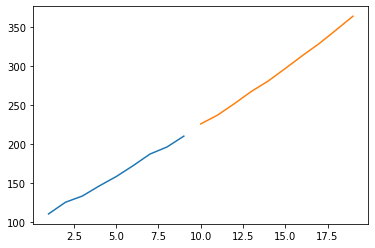

In [21]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)